# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

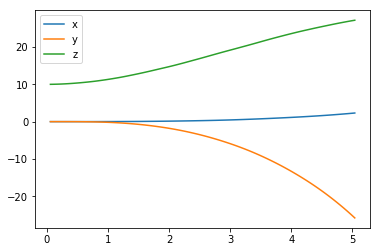

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

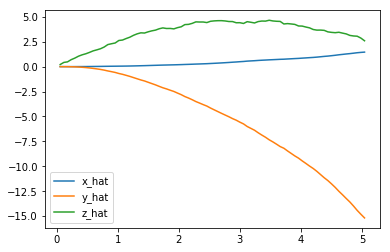

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

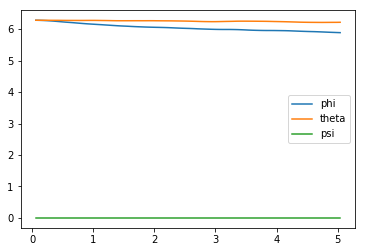

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

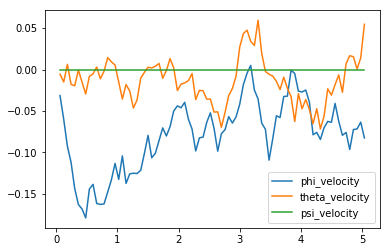

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

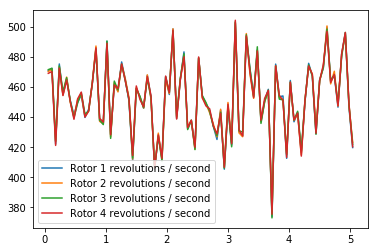

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.90424617  -1.03189685  28.88558596   6.22900965   0.33414305   0.        ]
[-6.85725267 -0.74287041  5.15152349]
[-0.06154026  0.03847808  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [16]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.059 (best =   0.010), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## TODO: Train your agent here.

import csv
import numpy as np

import sys
import pandas as pd
from agents.agent import DDPG

# Creating my own, so I can alter reward, without destroying my control Task
from customtask import CustomTask

## We'll just try to maintain the init_pose :P .... ie, Let's hover.

init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 300
target_pos = np.array([0., 0., 10.])

# Creating my own, so I can alter reward, without destroying my control Task
task = CustomTask(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, 
            target_pos=target_pos)

# Let's try to start more exploratory and make it more experiential every n number of episodes
exploration_theta = 0.10
exploration_sigma = 0.15
exploration_decrement_iteration_count = 200
exploration_decrement_amount = 0.01

# Let's pass in the discount rate, too, to mess with it
discount_gamma = 0.9

# Initialize our DDPG Agent.
agent = DDPG(task, exploration_theta, exploration_sigma, discount_gamma) 

rewardLabels = ['episode', 'episode_reward', 'total_reward']
rewardResults = {x : [] for x in rewardLabels}

# Initialize reward. Could make methods on DDPG for this, but we'll just keep here for now.
total_reward = 0.
best_reward = 0.

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    episode_reward = 0.
    
    # Let's track xyz to see how it looks at end. See if it's hovering.
    episode_timestep = 0;
    xyzLabels = ['time_step', 'x', 'y', 'z']
    xyzResults = {x : [] for x in xyzLabels}
    
    if i_episode % exploration_decrement_iteration_count == 0:
        agent.decrementThetaSigma(exploration_decrement_amount)
        theta, sigma = agent.getThetaSigma()
        print("Updating theta: {:7.3f}, sigma: {:7.3f}".format(theta, sigma))
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        
        xyzResults['time_step'].append(episode_timestep)
        simxyz = task.getSimXYZ()
        xyzResult = {'x' : simxyz[0], 'y' : simxyz[1], 'z' : simxyz[2]}
        xyzResults['x'].append(xyzResult['x'])
        xyzResults['y'].append(xyzResult['y'])
        xyzResults['z'].append(xyzResult['z'])
        
        #print("i_episode: {0}, reward: {1}, done: {2}".format(i_episode, reward, done)) 
        #print("i_episode: {:4d}, time_step: {:4d}, x: {:7.3f}, y: {:7.3f}, z: {:7.3f}".format(i_episode, episode_timestep, xyzResult['x'], xyzResult['y'], xyzResult['z'])) 
        
        # Track our rewards
        total_reward += reward
        episode_reward += reward
        
        if reward > best_reward:
            best_reward = reward
        
        agent.step(action, reward, next_state, done)
        state = next_state
        
        episode_timestep += 1;
                
        if done:
            print("\rEpisode = {:4d}, episode_reward = {:7.3f}, total_reward = {:7.3f} (best = {:7.3f}), e_timesteps = {:4d})".format(
                i_episode, episode_reward, total_reward, best_reward, episode_timestep))  # [debug]
            rewardResults['episode'].append(i_episode)
            rewardResults['episode_reward'].append(episode_reward)
            rewardResults['total_reward'].append(total_reward)
            
            break
            
    sys.stdout.flush()

Using TensorFlow backend.


Episode =    1, episode_reward =  90.075, total_reward =  90.075 (best =   5.991), e_timesteps =   26)
Episode =    2, episode_reward =  95.018, total_reward = 185.093 (best =   5.991), e_timesteps =   28)
Episode =    3, episode_reward =  76.270, total_reward = 261.363 (best =   5.996), e_timesteps =   25)
Episode =    4, episode_reward =  68.492, total_reward = 329.855 (best =   5.996), e_timesteps =   25)
Episode =    5, episode_reward =  93.158, total_reward = 423.013 (best =   5.998), e_timesteps =   24)
Episode =    6, episode_reward =  93.927, total_reward = 516.940 (best =   5.998), e_timesteps =   25)
Episode =    7, episode_reward =  98.452, total_reward = 615.392 (best =   5.999), e_timesteps =   26)
Episode =    8, episode_reward = 101.843, total_reward = 717.235 (best =   5.999), e_timesteps =   26)
Episode =    9, episode_reward = 102.996, total_reward = 820.231 (best =   5.999), e_timesteps =   26)
Episode =   10, episode_reward = 102.061, total_reward = 922.291 (best = 

Episode =   80, episode_reward = 104.852, total_reward = 7795.512 (best =   5.999), e_timesteps =   29)
Episode =   81, episode_reward = 105.192, total_reward = 7900.705 (best =   5.999), e_timesteps =   29)
Episode =   82, episode_reward = 105.015, total_reward = 8005.720 (best =   5.999), e_timesteps =   29)
Episode =   83, episode_reward = 105.529, total_reward = 8111.249 (best =   5.999), e_timesteps =   29)
Episode =   84, episode_reward = 105.031, total_reward = 8216.280 (best =   5.999), e_timesteps =   29)
Episode =   85, episode_reward = 104.782, total_reward = 8321.062 (best =   5.999), e_timesteps =   29)
Episode =   86, episode_reward = 104.888, total_reward = 8425.950 (best =   5.999), e_timesteps =   29)
Episode =   87, episode_reward = 104.526, total_reward = 8530.476 (best =   5.999), e_timesteps =   29)
Episode =   88, episode_reward = 105.648, total_reward = 8636.124 (best =   5.999), e_timesteps =   29)
Episode =   89, episode_reward = 105.011, total_reward = 8741.13

Episode =  159, episode_reward =  93.608, total_reward = 13915.740 (best =   5.999), e_timesteps =   31)
Episode =  160, episode_reward =  78.772, total_reward = 13994.513 (best =   5.999), e_timesteps =   22)
Episode =  161, episode_reward =  88.379, total_reward = 14082.892 (best =   5.999), e_timesteps =   31)
Episode =  162, episode_reward =  73.493, total_reward = 14156.385 (best =   5.999), e_timesteps =   28)
Episode =  163, episode_reward = 248.988, total_reward = 14405.373 (best =   5.999), e_timesteps =   84)
Episode =  164, episode_reward =  98.600, total_reward = 14503.972 (best =   5.999), e_timesteps =   36)
Episode =  165, episode_reward =  81.387, total_reward = 14585.359 (best =   5.999), e_timesteps =   84)
Episode =  166, episode_reward =  68.157, total_reward = 14653.517 (best =   5.999), e_timesteps =   25)
Episode =  167, episode_reward =  87.842, total_reward = 14741.359 (best =   5.999), e_timesteps =   26)
Episode =  168, episode_reward =  87.688, total_reward 

Episode =  237, episode_reward =  89.951, total_reward = 19009.562 (best =   5.999), e_timesteps =   33)
Episode =  238, episode_reward = 125.654, total_reward = 19135.216 (best =   5.999), e_timesteps =   31)
Episode =  239, episode_reward =  86.184, total_reward = 19221.400 (best =   5.999), e_timesteps =   38)
Episode =  240, episode_reward =  84.293, total_reward = 19305.693 (best =   5.999), e_timesteps =   33)
Episode =  241, episode_reward =  42.158, total_reward = 19347.851 (best =   5.999), e_timesteps =   27)
Episode =  242, episode_reward =  90.820, total_reward = 19438.671 (best =   5.999), e_timesteps =   34)
Episode =  243, episode_reward =  96.895, total_reward = 19535.566 (best =   5.999), e_timesteps =   33)
Episode =  244, episode_reward = 100.844, total_reward = 19636.410 (best =   5.999), e_timesteps =   31)
Episode =  245, episode_reward =  99.311, total_reward = 19735.721 (best =   5.999), e_timesteps =   26)
Episode =  246, episode_reward =  67.567, total_reward 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

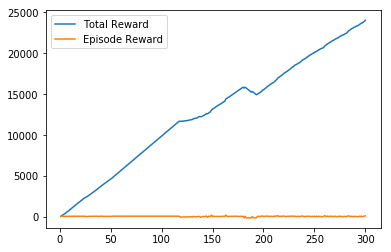

In [2]:
## TODO: Plot the rewards.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewardResults['episode'], rewardResults['total_reward'], label='Total Reward')
plt.plot(rewardResults['episode'], rewardResults['episode_reward'], label='Episode Reward')
plt.legend()
_ = plt.ylim()

## Plot the Final Episode X Y Z

Because I'm curious how the drone is behaving during the hover operation

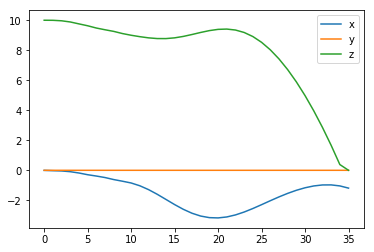

In [3]:
## Plotting xyz of last episode, just because I'm curious

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(xyzResults['time_step'], xyzResults['x'], label='x')
plt.plot(xyzResults['time_step'], xyzResults['y'], label='y')
plt.plot(xyzResults['time_step'], xyzResults['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

Oh my goodness .... The question is not how DID I design the reward function, the question is more how did I __NOT__ design the reward function.

As you can see from all the commented code in __customtask.py__, I went through what seemed like 5 million iterations, along with the corresponding ups and downs that occurred while watching the DDPG's logs come back, showing me not only the rewards of each iteration, but also the number of timesteps my copter stayed in the air.

I tried everything I could think of to boost reward for the copter's Z axis staying roughly at its target (10). I used the default reward function and boosted from there. Sometimes I would boost, based on the distance from the target elevation. In other iterations, I coded in more methods so I could track the copter's progress along the Z axis (ie, is it returning towards the target?? If so, reward extra).

I tried simple reward clipping. I tried rewarding according to target Z. I tried rewarding according to small incremental movements along Z. 

I tried different settings. I tried making it more experimental. I tried coding in methods, so I could make it more experiential as episodes progressed.

In the end, I went back to a simpler method, as I'm pretty much out of time and can't afford to waste anymore.... And also, I'm going blind from staring at this screen.

__In the end, because the default reward mechanism could get very negative very quickly, in terms of total episode reward, I decided to limit the most negative value at -1, decreased the target coordinate multiplier from 0.3 to 0.2, and finally subtracted it from 2, instead of 1.__

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
I used the DDPG agent that was provided in the workspace instructions, as I really wanted to see it learn in action.

- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
gamma was 0.9, but note I tried many iterations by experimenting with this (as you can see I added code to be able to specify this on agent creation). I finally settled on this value after many iterations. It just didn't seem to behave and hover as effectively when gamma was lower.

epsilon parameters I used above were called exploration_theta and exploration_sigma, and I coded in accessors, so I could modify those during long runs to see if becoming more experiential would help. I can't say that it really did help all that much. I ended up going back to 0.10 and 0.15 respectively, since going higher made it a bit more unpredictable.

I left tau alone, as 0.01 seemed like a typical learning rate.

I did decrease the batch size in the DDPG to 32 (from 64), in order to make it learn more frequently, but I don't know that this helped all that much either.

- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.
I just used the default that came with the DDPG. Actor has 3 hidden layers with a sigmoid activation function, while the Critic has a couple hidden layers for each state and action, with Relu activation functions.

They seemed fully sufficient, and I had more than enough trouble tuning hyper-parameters, let alone rebuilding the provided neual networks.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
It seems like a very hard task to learn. As a matter of fact, although I am fairly happy at the hovering in my X Y Z Plot for the majority of the episode, I can't really say it ever got that much better. I'm happy that it continued pursuing rewards after taking a dip, but I'm also not completely discouraged by the dip. From my experience, the most negative episodal rewards were associated with more episode timesteps (ie, copter staying in the air longer), so I'm a little mixed on looking solely at the rewards as a measure of success. Rewards are nice, but when I see a large negative reward, combined with 84 timesteps in the episode, I'm left to wonder why that's a bad thing.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
There were so many challenges in this project, I wouldn't even know where to begin. For starters, this entire section (reinforcement learning / deep reinforcement learning) is enormous. So much new information to digest.

Second, like so many other people on the boards, I was left with a "where do I start?" feeling when opening this project. It was not clear to me at all that we should be using the DDPG and task that were in slides following the Project tab in the workspace.

Couple this with the fact that there is virtually no information about what all the angles do, what the physics do, the measure of the rotors, etc, and I realize that I need to understand a lot more about this helicopter to __EFFECTIVELY__ code out a reward mechanism. I learned the basing reward on Z axis (hovering) was fine, except that when the X and Y start to go (much less any of the angles), there's not much you can do to save the Z axis -- gravity is taking over.

My biggest interest -- and __BY FAR__ my most annoying observation -- is that my biggest negative episodal rewards were arrived at when the copter stayed in the air the longest (at the max 84 timesteps). It's as if there were many slight timestep negative rewards, mixed with some positive rewards, but overall they added to a large negative. However, I had mixed feelings, as the copter stayed in the air the longest.